# MNIST 

In [ ]:
# import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

In [ ]:
def load_data():
  (train_samples,train_labels), (test_samples,test_labels) = mnist.load_data()
  return train_samples, train_labels, test_samples, test_labels

train_samples, train_labels, test_samples, test_labels = load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# check the shape of the data
print(train_samples.shape)
print(train_labels.shape)
print(test_samples.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
def convert_dtype(x):
   
    
    x_float=x.astype('float32')
    return x_float

train_samples = convert_dtype(train_samples)
test_samples = convert_dtype(test_samples)

In [ ]:
def normalize(x):
  y = (x - np.min(x))/np.ptp(x)   #ptp function is used to find the range
  return y

train_samples = normalize(train_samples)
test_samples = normalize(test_samples)

In [ ]:
# We need to reshape our train_data to be of shape (samples, height, width, channels) pass to Conv2D layer of keras

def reshape(x):
    
    
    x_r=x.reshape(x.shape[0],x.shape[1],x.shape[2],1)
    return x_r

train_samples = reshape(train_samples)
test_samples = reshape(test_samples)

In [ ]:
def oneHot(y, Ny):
    
    import tensorflow 
    from keras.utils import to_categorical
    Ny=len(np.unique(y))
    y_oh=to_categorical(y,num_classes=Ny)
    return y_oh

# example
train_labels = oneHot(train_labels, 10)
test_labels = oneHot(test_labels, 10)

In [ ]:
model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(train_samples, train_labels, validation_split = 0.1, epochs=10, batch_size=128)

Epoch 1/10
422/422 [==============================] - 13s 10ms/step - loss: 0.2061 - accuracy: 0.9406 - val_loss: 0.0768 - val_accuracy: 0.9795
Epoch 2/10
422/422 [==============================] - 4s 8ms/step - loss: 0.0606 - accuracy: 0.9815 - val_loss: 0.0537 - val_accuracy: 0.9845
Epoch 3/10
422/422 [==============================] - 4s 9ms/step - loss: 0.0419 - accuracy: 0.9870 - val_loss: 0.0522 - val_accuracy: 0.9865
Epoch 4/10
422/422 [==============================] - 4s 9ms/step - loss: 0.0304 - accuracy: 0.9904 - val_loss: 0.0501 - val_accuracy: 0.9863
Epoch 5/10
422/422 [==============================] - 4s 8ms/step - loss: 0.0239 - accuracy: 0.9924 - val_loss: 0.0489 - val_accuracy: 0.9887
Epoch 6/10
422/422 [==============================] - 4s 9ms/step - loss: 0.0181 - accuracy: 0.9940 - val_loss: 0.0521 - val_accuracy: 0.9878
Epoch 7/10
422/422 [==============================] - 4s 8ms/step - loss: 0.0149 - accuracy: 0.9951 - val_loss: 0.0581 - val_accuracy: 0.9870
Epoc

Text(0.5, 1.0, 'Model Loss')

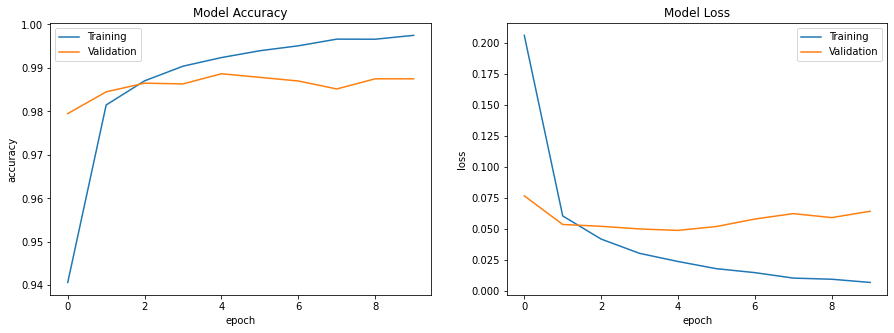

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(15,5)) 
axs[0].plot(history.history['accuracy'])
axs[0].plot(history.history['val_accuracy'])
axs[0].legend(['Training','Validation'])
axs[0].set_xlabel("epoch")
axs[0].set_ylabel("accuracy")
axs[0].set_title("Model Accuracy")

axs[1].plot(history.history['loss'])
axs[1].plot(history.history['val_loss'])
axs[1].legend(['Training','Validation'])
axs[1].set_xlabel("epoch")
axs[1].set_ylabel("loss")
axs[1].set_title("Model Loss")

In [ ]:
import cv2
from PIL import Image
import os

In [ ]:
#Custom Image Prediction
size = 28,28
image1="handwritten6.jpg"
im = Image.open(image1)
im_resized = im.resize(size, Image.ANTIALIAS)
im_resized.save("down.png","PNG")
    
img = cv2.imread("down.png",0)  
img = img / 255 
img = np.reshape(img,(1, 28, 28, 1)) 
prediction = model.predict(img)
print(prediction)

1/1 [==============================] - 0s 15ms/step
[[4.7262814e-03 9.9822417e-09 1.0372355e-03 2.2405643e-06 1.7285131e-06
  6.1848778e-03 9.6913391e-01 1.4890593e-07 1.6081581e-02 2.8320148e-03]]


Custom image was uploaded and reshaped for prediction on the basis of MNIST dataset training.

In [ ]:
# Generate arg maxes for predictions
handwritten = np.argmax(prediction, axis = 1)
print(handwritten)

[6]


Image has been predicted successfully.